In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 200)
plt.rcParams['figure.figsize'] = 10,6

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Load Sample Data

In [5]:
bike_rental_df = pd.read_csv("Datasets/bike_rental/train.csv", parse_dates=[0], index_col=0)

In [6]:
bike_rental_df.sort_index(inplace=True)

In [7]:
bike_rental_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bike_rental_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


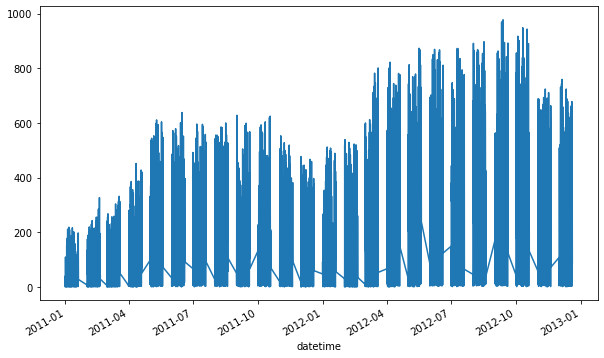

In [9]:
bike_rental_df['count'].plot.line()
plt.show()

In [10]:
bike_count_series = bike_rental_df['count']

In [11]:
bike_count_series.isnull().sum()

0

In [12]:
bike_count_series = bike_count_series.resample("H").mean()

In [13]:
bike_count_series.isnull().sum()

6370

In [14]:
bike_count_series.fillna(method="ffill", inplace=True)

In [15]:
bike_count_series.isnull().sum()

0

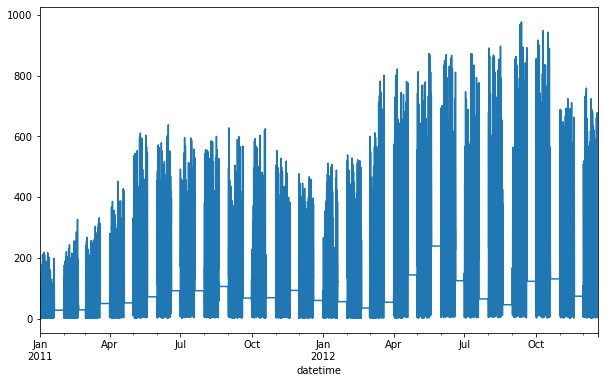

In [16]:
bike_count_series.plot.line()
plt.show()

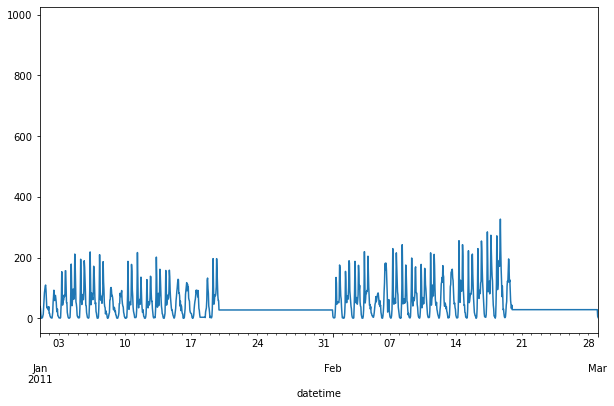

In [17]:
bike_count_series.plot.line()
plt.xlim(["2011-01-01", "2011-03-01"])
plt.show()

In [18]:
# bike_count_series["2011-01-20":"2011-02-05"]
for k, v in bike_rental_df['count']["2011-01-19":"2011-02-01"].items():
    print(k, v)

2011-01-19 00:00:00 3
2011-01-19 01:00:00 7
2011-01-19 02:00:00 3
2011-01-19 04:00:00 2
2011-01-19 05:00:00 7
2011-01-19 06:00:00 32
2011-01-19 07:00:00 90
2011-01-19 08:00:00 197
2011-01-19 09:00:00 109
2011-01-19 10:00:00 47
2011-01-19 11:00:00 52
2011-01-19 12:00:00 70
2011-01-19 13:00:00 78
2011-01-19 14:00:00 75
2011-01-19 15:00:00 82
2011-01-19 16:00:00 104
2011-01-19 17:00:00 197
2011-01-19 18:00:00 161
2011-01-19 19:00:00 112
2011-01-19 20:00:00 76
2011-01-19 21:00:00 59
2011-01-19 22:00:00 59
2011-01-19 23:00:00 28
2011-02-01 00:00:00 8
2011-02-01 01:00:00 3
2011-02-01 02:00:00 2
2011-02-01 03:00:00 2
2011-02-01 05:00:00 3
2011-02-01 06:00:00 22
2011-02-01 07:00:00 52
2011-02-01 08:00:00 135
2011-02-01 09:00:00 116
2011-02-01 10:00:00 47
2011-02-01 11:00:00 51
2011-02-01 12:00:00 55
2011-02-01 13:00:00 52
2011-02-01 14:00:00 54
2011-02-01 15:00:00 52
2011-02-01 16:00:00 64
2011-02-01 17:00:00 176
2011-02-01 18:00:00 168
2011-02-01 19:00:00 108
2011-02-01 20:00:00 74
2011-02-01

In [19]:
sample_bike_rental_series = bike_count_series["2011-01-01":"2011-01-19"]

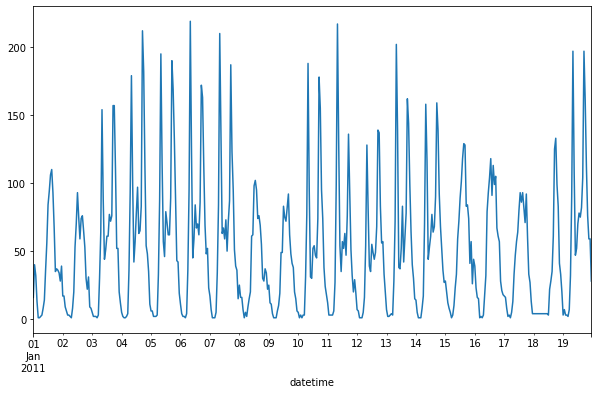

In [20]:
sample_bike_rental_series.plot.line()
plt.show()

In [21]:
# seasonal decompose
result = seasonal_decompose(sample_bike_rental_series, model="additive")

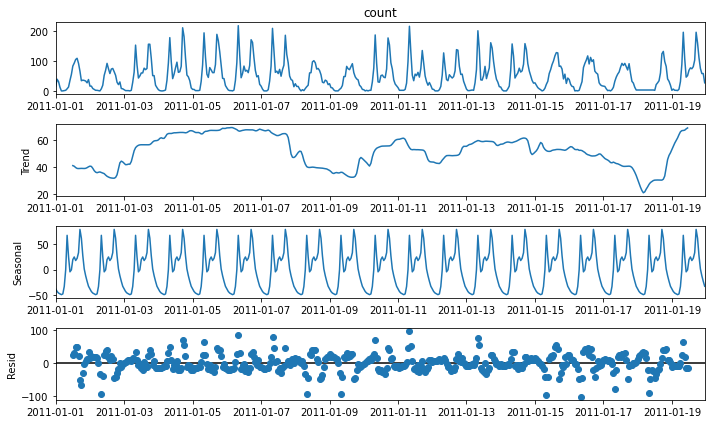

In [22]:
result_plot = result.plot()

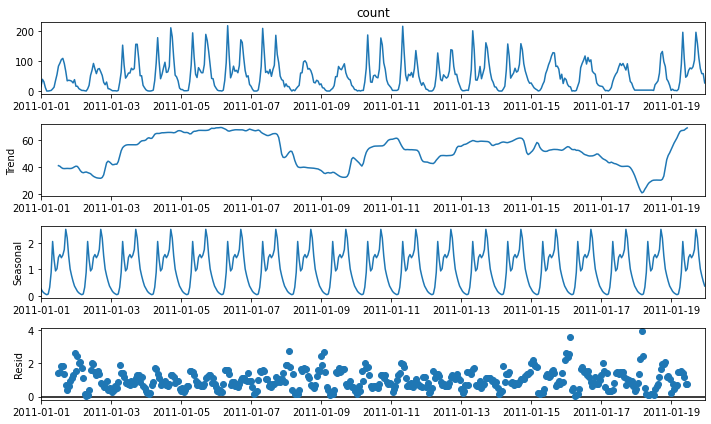

In [23]:
result = seasonal_decompose(sample_bike_rental_series, model="multiplicative")
result_plot = result.plot()

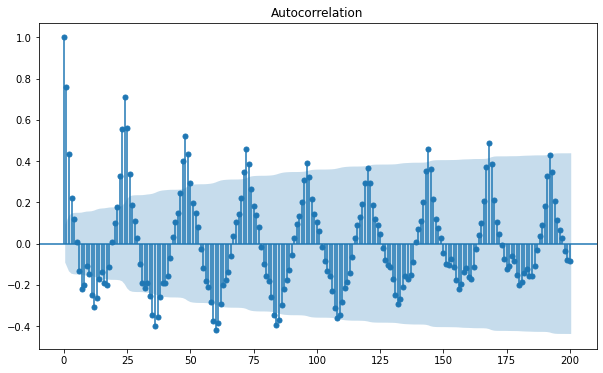

In [24]:
acf = plot_acf(sample_bike_rental_series, lags=200)

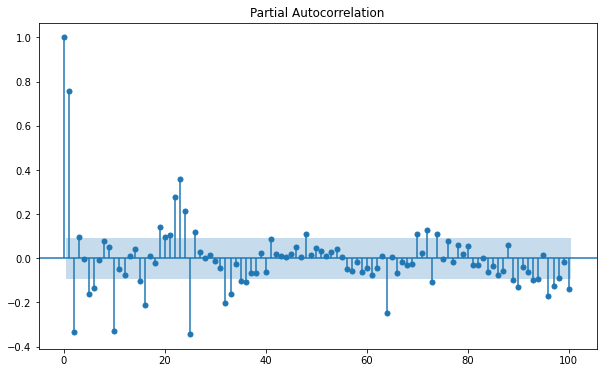

In [28]:
pacf = plot_pacf(sample_bike_rental_series, lags=100)

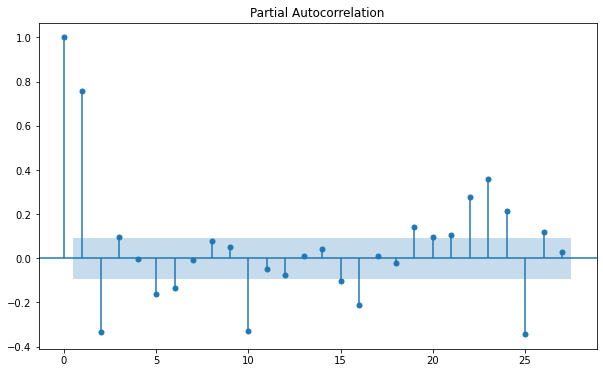

In [25]:
pacf = plot_pacf(sample_bike_rental_series)

## Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [29]:
from statsmodels.tsa.ar_model import AutoReg
from random import random

In [72]:
data = [x + random() for x in range(1, 100)]

In [73]:
model = AutoReg(data, lags=3)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [74]:
model_fit = model.fit()

In [75]:
yhat = model_fit.predict(len(data), len(data)+10)

In [76]:
yhat

array([100.78834382, 101.86245708, 102.84531282, 103.85249906,
       104.85590489, 105.85856791, 106.86203153, 107.86500463,
       108.86807789, 109.87105118, 110.87397397])

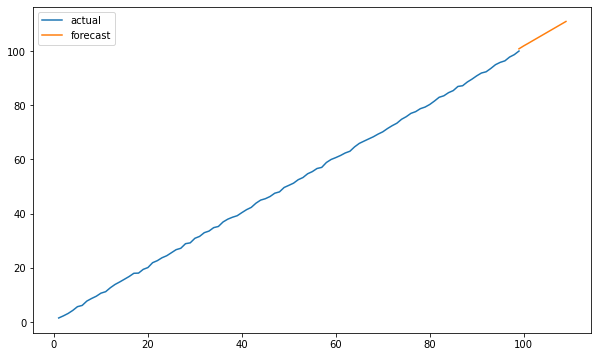

In [77]:
plt.plot(range(1, 100), data, label="actual")
plt.plot(range(len(data), len(data)+10+1), yhat, label="forecast")
plt.legend()
plt.show()

In [121]:
# test on the sample bike rental data
data = sample_bike_rental_series["2011-01-01":"2011-01-15"]
model = AutoReg(data, lags=1)
model_fit = model.fit()
yhat = model_fit.predict(start="2011-01-15 00:00:00", end="2011-01-19 23:00:00")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


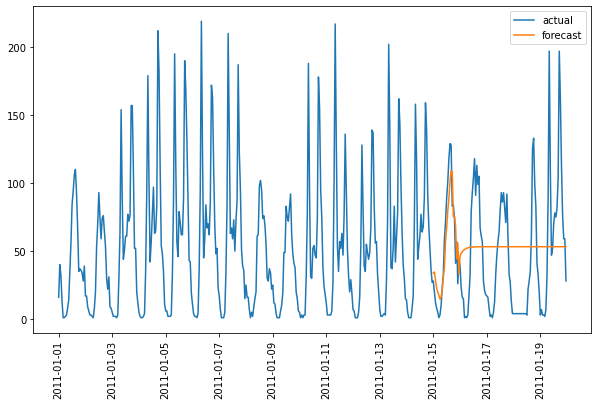

In [122]:
x1 = sample_bike_rental_series.index
y1 = sample_bike_rental_series
x2 = sample_bike_rental_series["2011-01-15 00:00:00":"2011-01-19 23:00:00"].index
y2 = yhat
plt.plot(x1, y1, label="actual")
plt.plot(x2, y2, label='forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [123]:
# test on the sample bike rental data
data = sample_bike_rental_series["2011-01-01":"2011-01-15"]
model = AutoReg(data, lags=50)
model_fit = model.fit()
yhat = model_fit.predict(start="2011-01-15 00:00:00", end="2011-01-19 23:00:00")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


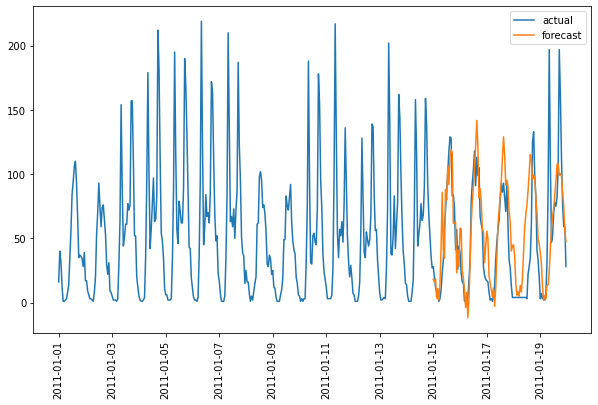

In [124]:
x1 = sample_bike_rental_series.index
y1 = sample_bike_rental_series
x2 = sample_bike_rental_series["2011-01-15 00:00:00":"2011-01-19 23:00:00"].index
y2 = yhat
plt.plot(x1, y1, label="actual")
plt.plot(x2, y2, label='forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [32]:
# select lags base pacf plot
data = sample_bike_rental_series["2011-01-01":"2011-01-15"]
model = AutoReg(data, lags=[1, 2, 10, 16, 22, 23, 24, 25])
model_fit = model.fit()
yhat = model_fit.predict(start="2011-01-15 00:00:00", end="2011-01-19 23:00:00")

D:\Apps\Anaconda\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
D:\Apps\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


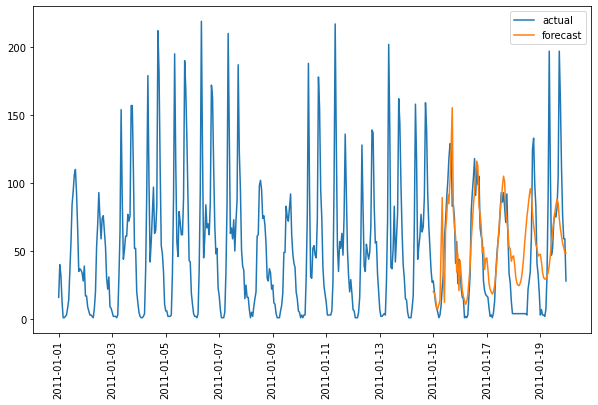

In [33]:
x1 = sample_bike_rental_series.index
y1 = sample_bike_rental_series
x2 = sample_bike_rental_series["2011-01-15 00:00:00":"2011-01-19 23:00:00"].index
y2 = yhat
plt.plot(x1, y1, label="actual")
plt.plot(x2, y2, label='forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Moving Average (MA)
